# Python para finanças - simulação Monte Carlos para previsão de preços de ações

## Importação das bibliotecas e preparação da base de dados

In [70]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats
from datetime import date
import statistics

In [7]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,AMAR,BIDI,SPXI11,MGLU,NTCO,BOVA,BRFS,GGBR,VALE3
0,2019-12-18,12.11,14.818278,136.300003,12.1325,36.759998,110.160004,34.330002,17.830000,53.470001
1,2019-12-19,12.19,14.581799,136.869995,12.1550,38.849998,110.820000,34.369999,18.270000,54.000000
2,2019-12-20,12.37,14.555153,138.600006,12.1475,39.040001,110.839996,34.810001,19.150000,54.790001
3,2019-12-23,12.79,14.451901,137.490005,12.1850,39.849998,111.669998,34.529999,19.459999,54.580002
4,2019-12-26,13.23,14.651743,137.360001,12.2725,39.439999,112.809998,35.180000,19.889999,54.790001
...,...,...,...,...,...,...,...,...,...,...
458,2021-10-29,4.11,36.000000,276.000000,10.8100,38.900002,99.680000,23.230000,26.900000,71.610001
459,2021-11-01,4.37,42.310001,278.690002,11.3000,40.160000,101.699997,23.100000,26.600000,72.320000
460,2021-11-03,4.68,44.580002,275.799988,11.5500,40.520000,102.000000,23.830000,25.549999,66.830002
461,2021-11-04,4.51,43.400002,278.399994,11.0800,39.049999,99.650002,23.280001,25.530001,66.070000


In [8]:
figura = px.line(title = 'Histórico do preço das ações')
for i in dataset.columns[1:]:
  figura.add_scatter(x = dataset['Date'], y = dataset[i], name = i)
figura.show()

In [9]:
dataset = pd.DataFrame(dataset['BIDI'])
dataset

,BIDI
0,14.818278
1,14.581799
2,14.555153
3,14.451901
4,14.651743
...,...
458,36.000000
459,42.310001
460,44.580002
461,43.400002


In [10]:
dataset_normalizado = dataset.copy()
for i in dataset:
  dataset_normalizado[i] = dataset[i] / dataset[i][0]
dataset_normalizado

,BIDI
0,1.000000
1,0.984041
2,0.982243
3,0.975275
4,0.988761
...,...
458,2.429432
459,2.855258
460,3.008447
461,2.928815


In [11]:
dataset_taxa_retorno = np.log(1 + dataset_normalizado.pct_change())
dataset_taxa_retorno

,BIDI
0,NaN
1,-0.016087
2,-0.001829
3,-0.007119
4,0.013733
...,...
458,-0.093035
459,0.161505
460,0.052262
461,-0.026826


In [12]:
dataset_taxa_retorno.fillna(0, inplace=True)
dataset_taxa_retorno.head()

,BIDI
0,0.000000
1,-0.016087
2,-0.001829
3,-0.007119
4,0.013733


## Cálculo do drift

In [13]:
media = dataset_taxa_retorno.mean()
media

BIDI    0.002455
dtype: float64

In [14]:
variancia = dataset_taxa_retorno.var()
variancia

BIDI    0.002165
dtype: float64

In [15]:
drift = media - (0.5 * variancia)
drift

BIDI    0.001372
dtype: float64

## Cálculo dos retornos diários

In [16]:
dias_frente = 50
simulacoes = 10

In [17]:
desvio_padrao = dataset_taxa_retorno.std()
desvio_padrao

BIDI    0.046533
dtype: float64

In [18]:
Z = stats.norm.ppf(np.random.rand(dias_frente, simulacoes))

In [19]:
Z.shape

(50, 10)

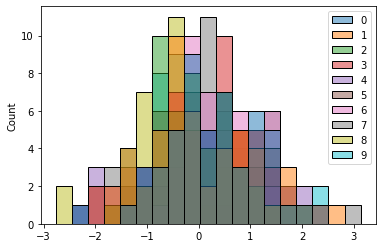

In [20]:
sns.histplot(Z);

In [21]:
Z

array([[ 1.39037951e+00,  8.85023756e-01, -1.50096389e+00,
         8.91881569e-01, -1.97534842e+00, -4.97065388e-01,
        -1.43009655e-01,  2.28311279e+00, -7.99218957e-02,
         1.28526466e+00],
       [ 5.40669291e-01, -5.68045264e-01, -7.32972102e-01,
         7.41726483e-01,  1.91663798e+00, -2.51999098e-01,
         3.50486489e-01, -1.14384446e-01, -4.82711188e-01,
        -7.63868344e-01],
       [-6.83382864e-03, -5.28093887e-01,  9.64034789e-01,
         1.46999186e+00,  1.26229181e+00, -1.22771213e+00,
        -7.66908116e-02,  8.06227591e-01,  1.11018875e+00,
        -6.83988911e-01],
       [ 3.82058963e-01,  9.89597415e-01, -6.70802499e-01,
        -3.34528282e-02, -4.69517530e-02, -8.19426609e-01,
        -1.53651992e+00,  6.40931356e-01, -1.03375699e-01,
        -4.92943080e-02],
       [ 1.06512222e+00,  1.02352143e+00, -6.87045871e-01,
        -3.92938506e-01,  1.26975511e+00, -6.40811828e-01,
         9.71754206e-01, -9.80011061e-01, -4.69684450e-02,
        -4.

In [22]:
retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

In [23]:
retornos_diarios.shape

(50, 10)

In [24]:
retornos_diarios

array([[1.06830148, 1.04347286, 0.9338197 , 1.0438059 , 0.91343206,
        0.97847715, 0.99473124, 1.11361472, 0.99765571, 1.06308888],
       [1.02688578, 0.97525069, 0.96779479, 1.03653813, 1.09478521,
        0.98969917, 1.01783823, 0.99605711, 0.97913094, 0.96640441],
       [1.00105449, 0.97706541, 1.04731635, 1.07226642, 1.06195306,
        0.94576914, 0.99780572, 1.03965387, 1.05446335, 0.97000322],
       [1.01933469, 1.04856287, 0.9705986 , 0.9998153 , 0.99918747,
        0.96390922, 0.93227595, 1.03168787, 0.99656749, 0.99907856],
       [1.05225439, 1.05021941, 0.96986525, 0.98322967, 1.06232193,
        0.97195406, 1.04769261, 0.95673332, 0.9991867 , 0.98193921],
       [0.97730381, 0.99938428, 1.02618345, 1.0271212 , 1.02693857,
        0.95776832, 1.0279884 , 1.01240869, 1.04740439, 1.00837758],
       [0.94866045, 0.96912096, 1.01633441, 1.0486661 , 1.01587895,
        1.03054779, 1.07504779, 1.03444   , 0.94980369, 1.00848085],
       [1.00149093, 1.00089822, 0.9906610

## Previsões de preços futuros

In [25]:
previsoes = np.zeros_like(retornos_diarios)

In [26]:
previsoes.shape

(50, 10)

In [27]:
previsoes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [28]:
previsoes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
dataset.tail(1)

,BIDI
462,46.169998


In [30]:
dataset.iloc[-1]

BIDI    46.169998
Name: 462, dtype: float64

In [31]:
previsoes[0] = dataset.iloc[-1]
previsoes

array([[46.16999817, 46.16999817, 46.16999817, 46.16999817, 46.16999817,
        46.16999817, 46.16999817, 46.16999817, 46.16999817, 46.16999817],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [32]:
for dia in range(1, dias_frente):
  #print(dia)
  previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

In [33]:
previsoes.shape

(50, 10)

In [34]:
92.41000366 * 1.00854274

93.19943829466642

In [35]:
93.19943859 * 0.98145488

91.47104381741582

In [36]:
previsoes

array([[ 46.16999817,  46.16999817,  46.16999817,  46.16999817,
         46.16999817,  46.16999817,  46.16999817,  46.16999817,
         46.16999817,  46.16999817],
       [ 47.41131469,  45.02732261,  44.68308377,  47.85696334,
         50.54623102,  45.69440867,  46.99358937,  45.98795512,
         45.20647351,  44.61888977],
       [ 47.46130952,  43.99463946,  46.79732398,  51.31541468,
         53.67772467,  43.21636179,  46.89047209,  47.81155562,
         47.6685694 ,  43.28046674],
       [ 48.37895924,  46.13114523,  45.42141692,  51.30593674,
         53.63411005,  41.65664938,  43.71485963,  49.32660199,
         47.50494661,  43.24058647],
       [ 50.90697207,  48.44782401,  44.0526538 ,  50.44551947,
         56.9766911 ,  40.4883493 ,  45.79973555,  47.19240388,
         47.46631068,  42.45962742],
       [ 49.75157801,  48.41799355,  45.20610432,  51.81366254,
         58.51156149,  38.77845826,  47.08159678,  47.77799972,
         49.71642204,  42.81533634],
       [ 4

## Gráfico das previsões

In [37]:
len(previsoes)

50

In [38]:
previsoes.T.shape, previsoes.shape

((10, 50), (50, 10))

In [39]:
previsoes.T

array([[ 46.16999817,  47.41131469,  47.46130952,  48.37895924,
         50.90697207,  49.75157801,  47.19735438,  47.26772215,
         46.72091621,  50.32101079,  52.46053569,  52.9009179 ,
         52.86461558,  53.11341206,  51.61573024,  53.24595079,
         52.6865373 ,  47.14625237,  46.5681998 ,  45.2323227 ,
         45.32917506,  46.14125817,  47.46777956,  50.92069802,
         51.90189756,  53.222998  ,  56.5972437 ,  55.95236652,
         56.43383763,  59.30008677,  59.09081438,  63.27500213,
         60.95866067,  61.93666047,  68.44832666,  68.48494764,
         68.83893081,  71.2971926 ,  70.52951837,  74.83280916,
         71.54192287,  75.45822499,  70.77460856,  73.75623896,
         72.39134397,  69.43897457,  72.88857705,  78.84581318,
         77.87243453,  81.95998782],
       [ 46.16999817,  45.02732261,  43.99463946,  46.13114523,
         48.44782401,  48.41799355,  46.92289246,  46.96503976,
         46.23174754,  49.20278734,  50.30954744,  49.66299056,
   

In [40]:
figura = px.line(title = 'Previsões do preço das ações - simulações')
for i in range(len(previsoes.T)):
  figura.add_scatter(y = previsoes.T[i], name = i)
figura.show()

## Comparação das previsões com os preços reais

In [54]:
from pandas_datareader import data
hj = date.today()
dataset_bova = data.DataReader(name = 'BIDI11.SA', data_source='yahoo', start=date.fromordinal(hj.toordinal()-dias_frente))['Close']
dataset_bova

Date
2021-09-20    56.980000
2021-09-21    58.049999
2021-09-22    59.250000
2021-09-23    60.500000
2021-09-24    61.080002
2021-09-27    58.709999
2021-09-28    51.680000
2021-09-29    50.000000
2021-09-30    46.650002
2021-10-01    51.160000
2021-10-04    44.150002
2021-10-05    43.150002
2021-10-06    41.840000
2021-10-07    46.470001
2021-10-08    50.009998
2021-10-11    44.880001
2021-10-13    48.400002
2021-10-14    50.900002
2021-10-15    50.500000
2021-10-18    48.299999
2021-10-19    45.020000
2021-10-20    48.500000
2021-10-21    43.000000
2021-10-22    40.139999
2021-10-25    42.220001
2021-10-26    39.820000
2021-10-27    40.099998
2021-10-28    39.509998
2021-10-29    36.000000
2021-11-01    42.310001
2021-11-03    44.580002
2021-11-04    43.400002
2021-11-05    46.169998
Name: Close, dtype: float64

In [55]:
dataset_bova.to_csv('bidi_teste.csv')

In [56]:
dataset_bova = pd.read_csv('bidi_teste.csv')
dataset_bova

,Date,Close
0,2021-09-20,56.980000
1,2021-09-21,58.049999
2,2021-09-22,59.250000
3,2021-09-23,60.500000
4,2021-09-24,61.080002
5,2021-09-27,58.709999
6,2021-09-28,51.680000
7,2021-09-29,50.000000
8,2021-09-30,46.650002
9,2021-10-01,51.160000


In [57]:
len(dataset_bova)

33

In [58]:
simulacao1 = previsoes.T[0][0:len(dataset_bova)]
simulacao1

array([46.16999817, 47.41131469, 47.46130952, 48.37895924, 50.90697207,
       49.75157801, 47.19735438, 47.26772215, 46.72091621, 50.32101079,
       52.46053569, 52.9009179 , 52.86461558, 53.11341206, 51.61573024,
       53.24595079, 52.6865373 , 47.14625237, 46.5681998 , 45.2323227 ,
       45.32917506, 46.14125817, 47.46777956, 50.92069802, 51.90189756,
       53.222998  , 56.5972437 , 55.95236652, 56.43383763, 59.30008677,
       59.09081438, 63.27500213, 60.95866067])

In [59]:
len(simulacao1)

33

In [60]:
simulacao1.shape

(33,)

In [61]:
np.sum(abs(simulacao1 - dataset_bova['Close'])) / len(simulacao1)

8.90590657532127

In [62]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(dataset_bova['Close'], simulacao1)

8.90590657532127

In [63]:
erros = []
for i in range(len(previsoes.T)):
  simulacao = previsoes.T[i][0:len(dataset_bova)]
  erros.append(mean_absolute_error(dataset_bova['Close'], simulacao))

In [64]:
erros

[8.90590657532127,
 6.753245806556167,
 7.0669188127482325,
 4.6811310299473465,
 19.87910224123637,
 9.76715518570632,
 14.475871136129788,
 11.947946923423096,
 6.701877749670394,
 7.481642984140761]

In [74]:
maximo_pos = erros.index(max(erros))
minimo_pos = erros.index(min(erros))
moda_pos = erros.index(statistics.mode(erros))

In [75]:
figura = px.line(title = 'Previsões do preço das ações - simulação')
figura.add_scatter(y = dataset_bova['Close'], name = 'Valor real')
figura.add_scatter(y = previsoes.T[maximo_pos], name = 'Pior simulação') # Pior é o erro máximo
figura.add_scatter(y = previsoes.T[minimo_pos], name = 'Melhor simulação') # Melhor éo erro mínimo
figura.add_scatter(y = previsoes.T[moda_pos], name = 'Moda simulação') # Moda é o erro central

## Exercício

In [76]:
def monte_carlo_previsao(dataset, ativo, dias_a_frente, simulacoes):
  dataset = dataset.copy()
  dataset = pd.DataFrame(dataset[ativo])
  
  dataset_normalizado = dataset.copy()
  for i in dataset:
    dataset_normalizado[i] = dataset[i] / dataset[i][0]
  
  dataset_taxa_retorno = np.log(1 + dataset_normalizado.pct_change())
  dataset_taxa_retorno.fillna(0, inplace=True)
  
  media = dataset_taxa_retorno.mean()
  variancia = dataset_taxa_retorno.var()

  drift = media - (0.5 * variancia)
  desvio_padrao = dataset_taxa_retorno.std()
  Z = stats.norm.ppf(np.random.rand(dias_a_frente, simulacoes))
  retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

  previsoes = np.zeros_like(retornos_diarios)
  previsoes[0] = dataset.iloc[-1]

  for dia in range(1, dias_a_frente):
    previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

  figura = px.line(title = 'Previsões do preço das ações - ' + ativo)
  for i in range(len(previsoes.T)):
    figura.add_scatter(y = previsoes.T[i], name = i)
  figura.show()  

  return previsoes.T

In [77]:
previsoes = monte_carlo_previsao(pd.read_csv('acoes.csv'), 'BIDI', 50, 10)

In [78]:
previsoes[1]

array([46.16999817, 46.33116922, 48.59863421, 45.06876221, 45.08679336,
       47.0904039 , 45.97779414, 48.58386716, 49.70359917, 51.06142583,
       49.16307363, 48.49709274, 48.63956513, 50.38776753, 48.07365125,
       47.46201569, 46.64310003, 45.76926385, 44.73946658, 45.77851432,
       43.11536225, 44.06609037, 42.37372512, 42.90167759, 41.60017502,
       41.65483066, 45.24462592, 45.27808316, 46.46357013, 47.6568757 ,
       43.87203417, 40.92691857, 41.36627383, 40.43564489, 42.85992583,
       43.09162182, 45.35042018, 45.20731903, 46.3912157 , 51.84111866,
       50.24148998, 49.09197776, 46.37468581, 46.54535595, 48.97188272,
       44.84135425, 47.57540133, 48.08461641, 51.88142421, 50.85496288])

In [79]:
dataset = pd.read_csv('acoes.csv')
for ativo in dataset.columns[1:]:
  #print(ativo)
  monte_carlo_previsao(dataset, ativo, 100, 20)

In [81]:
dataset = pd.read_csv('acoes.csv')
for ativo in dataset.columns[1:]:
  monte_carlo_previsao(dataset, ativo, 30, 100)